<a href="https://colab.research.google.com/github/PXDHU/YouTube-Hate-Comments-Detection/blob/main/HateSpeech_preprocessing_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/My Drive/Youtube_HateComments_Detection/HateSpeechDataset.csv"

In [ ]:
df = pd.read_csv(file_path)
df.head()

,Content,Label,Content_int
0,denial of normal the con be asked to comment o...,1,"[146715, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,..."
1,just by being able to tweet this insufferable ...,1,"[146715, 14, 15, 16, 17, 7, 18, 19, 20, 21, 22..."
2,that is retarded you too cute to be single tha...,1,"[146715, 28, 29, 30, 26, 31, 32, 7, 5, 33, 28,..."
3,thought of a real badass mongol style declarat...,1,"[146715, 35, 1, 24, 36, 37, 38, 39, 40, 1, 41,..."
4,afro american basho,1,"[146715, 46, 47, 48, 146714]"


In [ ]:
df = df.drop(columns=["Content_int"])

In [ ]:
df.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [ ]:
df.shape

(440906, 2)

In [ ]:
df.sample()['Content'].values

array(['it s obvious you did not do the slightest bit of reading or real investigation'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 418528 entries, 0 to 440905
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Content  418528 non-null  object
 1   Label    418528 non-null  object
dtypes: object(2)
memory usage: 9.6+ MB


In [ ]:
df.isnull().sum()

,0
Content,0
Label,0


In [ ]:
df[df['Content'].isna()]

,Content,Label


In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df[df.duplicated()]

,Content,Label


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df[(df['Content'].str.strip() == ' ')]

,Content,Label


In [ ]:
df['Content'] = df['Content'].str.lower()
df.head()

,Content,Label
0,denial of normal the con be asked to comment o...,1
1,just by being able to tweet this insufferable ...,1
2,that is retarded you too cute to be single tha...,1
3,thought of a real badass mongol style declarat...,1
4,afro american basho,1


In [ ]:
df[df['Content'].apply(lambda x: x.endswith(' ') or x.startswith(' '))]

,Content,Label


In [ ]:
url_pattern = r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
contents_with_urls = df[df['Content'].str.contains(url_pattern, regex=True)]

contents_with_urls.head()

,Content,Label


In [ ]:
contents_with_newline = df[df['Content'].str.contains('\n')]

contents_with_newline.head()

,Content,Label


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='Label', ylabel='count'>

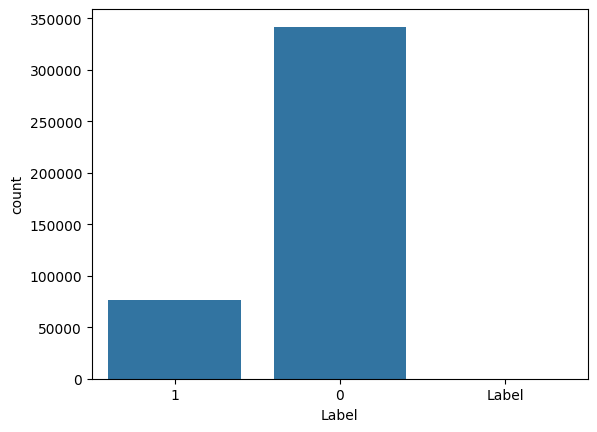

In [ ]:
sns.countplot(data=df, x="Label")

In [ ]:
df['Label'].value_counts(normalize=True).mul(100).round(2)

,proportion
Label,
0,81.71
1,18.29
Label,0.00


In [ ]:
print(df['Label'].unique())

['1' '0' 'Label']


In [ ]:
df = df[df['Label'].isin(['0', '1'])]

In [ ]:
df['Count'] = df['Content'].apply(lambda x: len(x.split()))

In [ ]:
print(df['Label'].unique())

['1' '0']


<Axes: xlabel='Label', ylabel='count'>

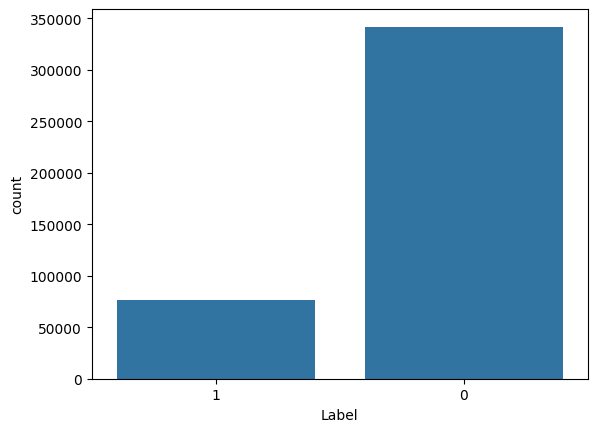

In [ ]:
sns.countplot(data=df, x="Label")

In [ ]:
df['Label'].value_counts(normalize=True).mul(100).round(2)

,proportion
Label,
0,81.71
1,18.29


In [ ]:
df.sample(5)

,Content,Label,Count
252240,it does not let erase the comment about the block,0,10
430927,i have changed my name as per your order is th...,0,41
335360,at least not in the into,0,6
197530,by saying has to be dealt i meant by the wikip...,0,21
100773,retweet it is your girls friends that you got ...,0,25


In [ ]:
df['Count'].describe()

,Count
count,418527.000000
mean,41.169320
std,49.566772
min,1.000000
25%,11.000000
50%,22.000000
75%,49.000000
max,300.000000


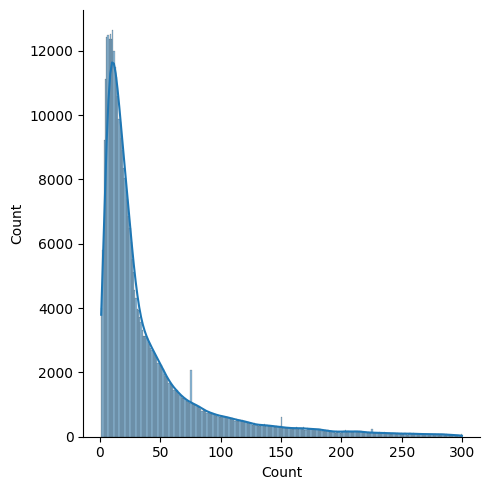

In [ ]:
sns.displot(df['Count'], kde=True)

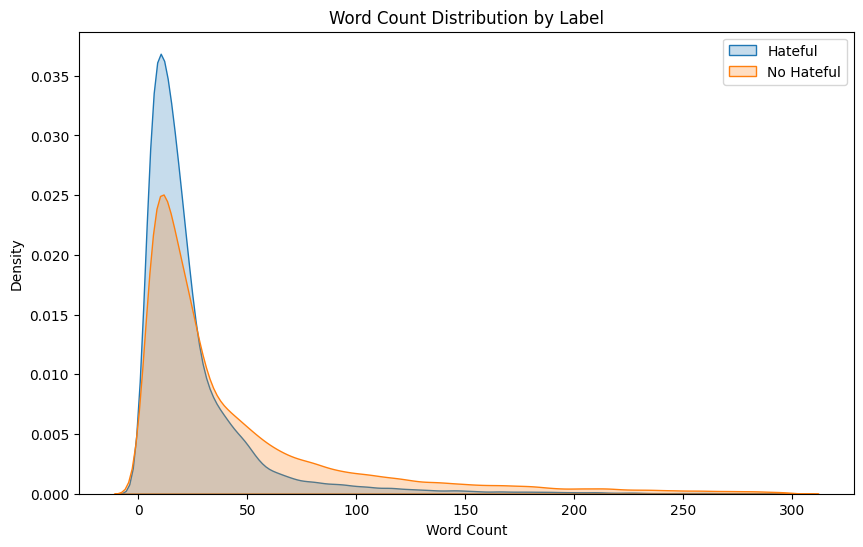

In [ ]:
from ipywidgets import Label
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['Label'] == '1']['Count'], label = 'Hateful', fill = True)

sns.kdeplot(df[df['Label'] == '0']['Count'], label = 'No Hateful', fill = True)

plt.title('Word Count Distribution by Label')
plt.xlabel('Word Count')
plt.ylabel('Density')
plt.legend()

plt.show()

<Axes: ylabel='Count'>

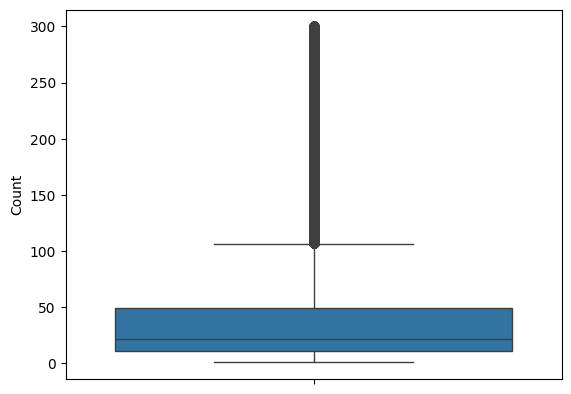

In [ ]:
sns.boxplot(df['Count'])

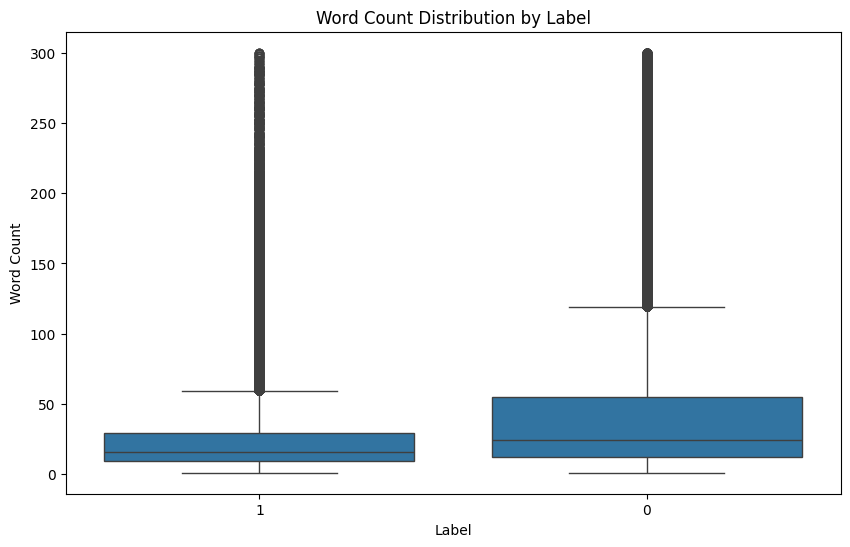

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Label', y='Count', data=df)
plt.title('Word Count Distribution by Label')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

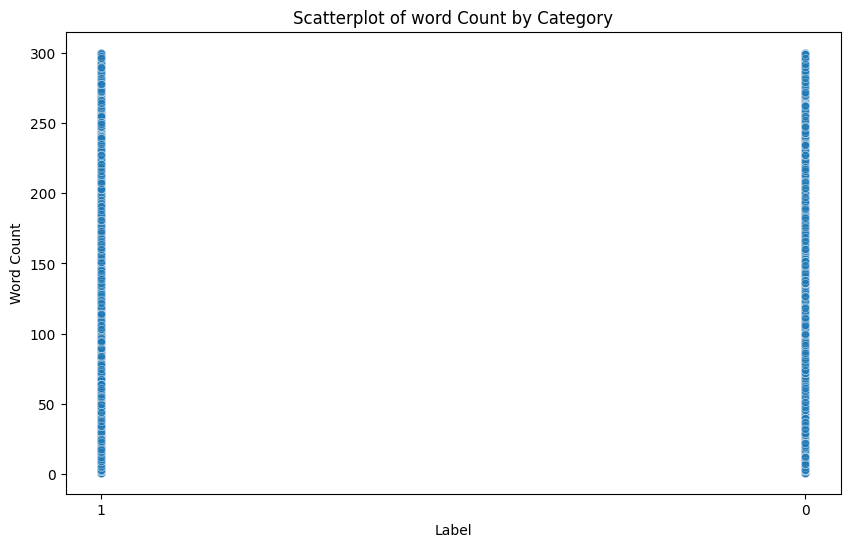

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Label', y='Count', data=df, alpha=0.5)
plt.title('Scatterplot of word Count by Category')
plt.xlabel('Label')
plt.ylabel('Word Count')
plt.show()

<Axes: xlabel='Label', ylabel='Count'>

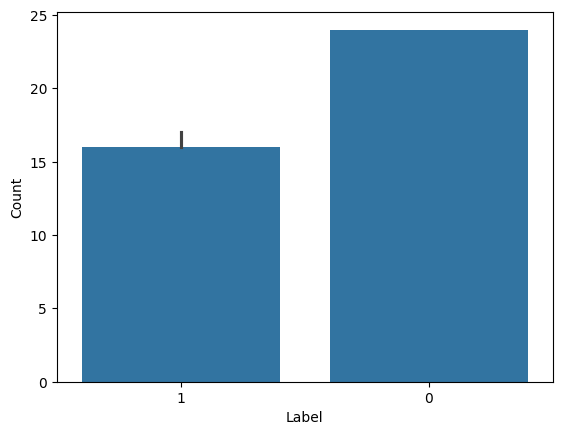

In [ ]:
sns.barplot(df, x='Label', y='Count', estimator='median')

In [ ]:
!pip install nltk

In [ ]:
from nltk.corpus import stopwords

import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

df['num_stopwords'] = df['Content'].apply(lambda x: len([w for w in x.split() if w in stop_words]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df.sample(5)

,Content,Label,Count,num_stopwords
384794,also from the routledge dictionary of philosop...,0,82,34
361371,even the image itself contains a copyright not...,0,21,9
312939,tame you make strange random noises and you ar...,0,20,12
321011,a sad couple days in orlando gun violence in t...,0,23,11
313214,paradise to the innocence that fell in orlando...,0,16,8


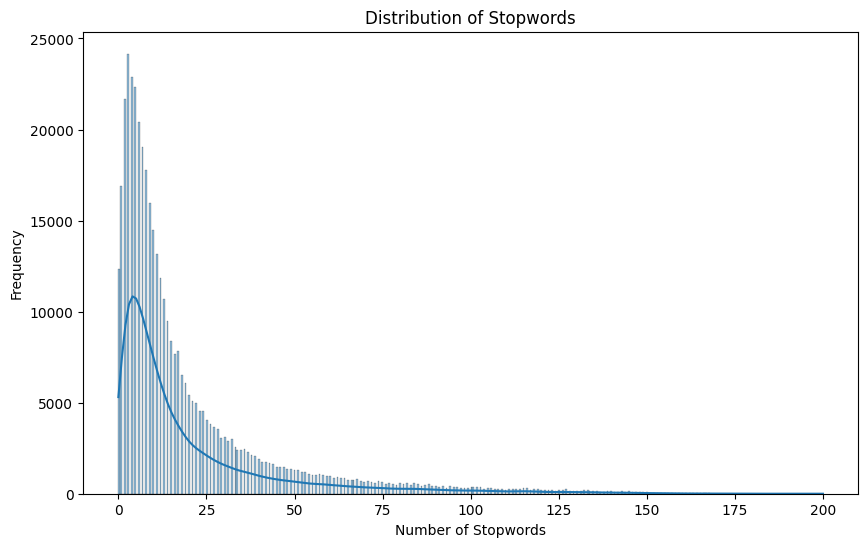

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['num_stopwords'], kde=True)
plt.title('Distribution of Stopwords')
plt.xlabel('Number of Stopwords')
plt.ylabel('Frequency')
plt.show()

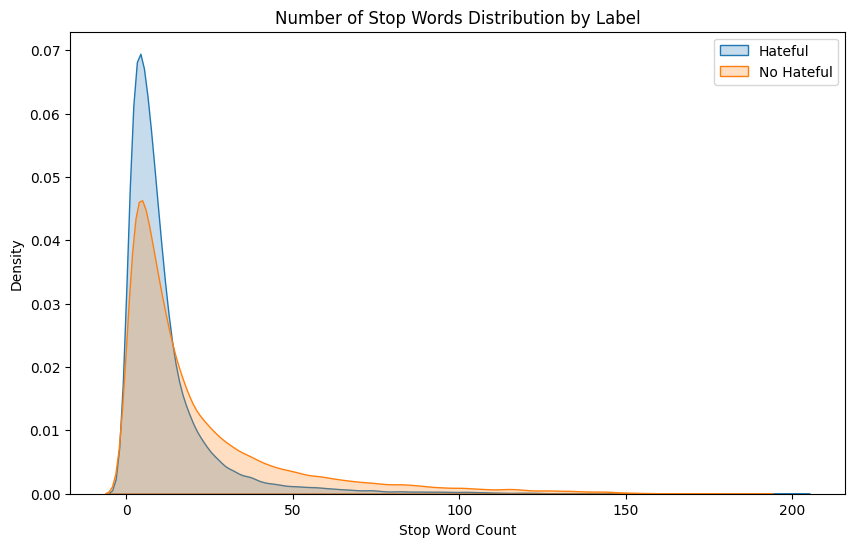

In [ ]:
plt.figure(figsize=(10,6))

sns.kdeplot(df[df['Label'] == '1']['num_stopwords'], label = 'Hateful', fill = True)

sns.kdeplot(df[df['Label'] == '0']['num_stopwords'], label = 'No Hateful', fill = True)

plt.title('Number of Stop Words Distribution by Label')
plt.xlabel('Stop Word Count')
plt.ylabel('Density')
plt.legend()

plt.show()

<Axes: xlabel='Label', ylabel='num_stopwords'>

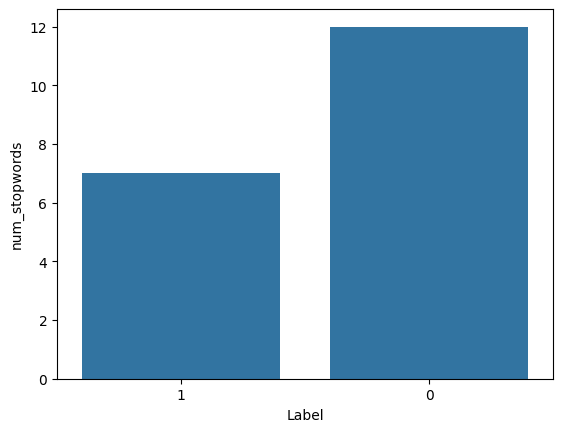

In [ ]:
sns.barplot(df, x='Label', y='num_stopwords', estimator='median')

/tmp/ipython-input-1086939280.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='Stopword', data=top_25_df, palette='viridis')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

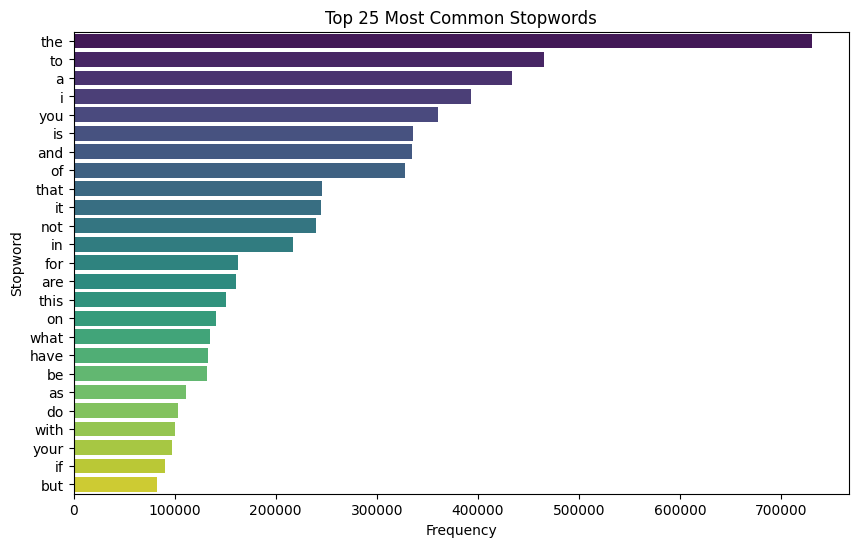

In [ ]:
from collections import Counter

all_stop_words = [word for content in df['Content'] for word in content.split() if word in stop_words]

most_common_stopwords = Counter(all_stop_words).most_common(25)

top_25_df = pd.DataFrame(most_common_stopwords, columns=['Stopword', 'Frequency'])

plt.figure(figsize=(10,6))
sns.barplot(x='Frequency', y='Stopword', data=top_25_df, palette='viridis')
plt.title('Top 25 Most Common Stopwords')
plt.xlabel('Frequency')
plt.ylabel('Stopword')
plt

In [ ]:
df['num_chars'] = df['Content'].apply(len)

df.head()

,Content,Label,Count,num_stopwords,num_chars
0,denial of normal the con be asked to comment o...,1,14,6,77
1,just by being able to tweet this insufferable ...,1,15,7,85
2,that is retarded you too cute to be single tha...,1,12,8,55
3,thought of a real badass mongol style declarat...,1,20,9,106
4,afro american basho,1,3,0,19


In [ ]:
df['num_chars'].describe()

,num_chars
count,418527.000000
mean,223.758582
std,277.698871
min,1.000000
25%,61.000000
50%,117.000000
75%,264.000000
max,9998.000000


In [ ]:
from collections import Counter

all_text = ' '.join(df['Content'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['Character', 'Frequency'])

In [ ]:
char_frequency_df = char_frequency_df.sort_values(by='Frequency', ascending=False)


In [ ]:
char_frequency_df['Character'].values

array([' ', 'e', 't', 'a', 'o', 'i', 'n', 's', 'r', 'h', 'l', 'd', 'u',
       'c', 'm', 'y', 'p', 'g', 'f', 'w', 'b', 'k', 'v', 'j', 'x', 'z',
       'q'], dtype=object)

In [ ]:
char_frequency_df.tail(50)

,Character,Frequency
6,,17230471
1,e,9081640
11,t,7227796
4,a,6398217
7,o,6188224
3,i,6116310
2,n,5085175
15,s,4881469
9,r,4333081
12,h,3608484


In [ ]:
df['num_punctutation_chars'] = df['Content'].apply(lambda x: sum([1 for char in x if char in '.,!;:"\'(){}[]-']))

df.sample(5)

,Content,Label,Count,num_stopwords,num_chars,num_punctutation_chars
224768,they will be removed thanks for catching it,0,8,5,43,0
279980,dear auburn pilot i ll just come back with a d...,1,25,11,130,0
173739,comment against dab planned band should remain...,0,99,47,552,0
51341,you can not come with us because you are weari...,0,13,8,60,0
392546,hi i just left a note in willow s page it what...,0,32,16,163,0


In [ ]:
df['num_punctutation_chars'].describe()

,num_punctutation_chars
count,418527.0
mean,0.0
std,0.0
min,0.0
25%,0.0
50%,0.0
75%,0.0
max,0.0


/tmp/ipython-input-3724354915.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_bigrams_df, x='Frequency', y='Bigram', palette='magma')


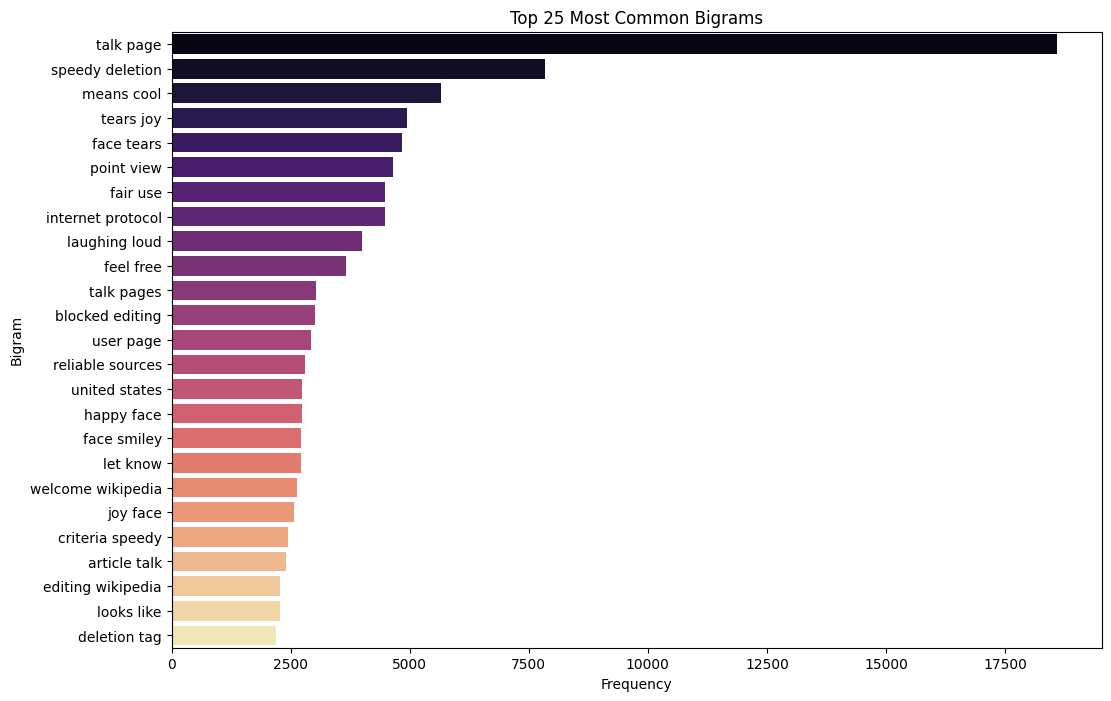

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2), stop_words='english').fit(corpus)
    bag_ofwords = vec.transform(corpus)
    sum_words = bag_ofwords.sum(axis=0)
    word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
    return word_freq[:n]

top_25_bigrams = get_top_ngrams(df['Content'], 25)

top_25_bigrams_df = pd.DataFrame(top_25_bigrams, columns=['Bigram', 'Frequency'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_bigrams_df, x='Frequency', y='Bigram', palette='magma')
plt.title('Top 25 Most Common Bigrams')
plt.xlabel('Frequency')
plt.ylabel('Bigram')
plt.show()

/tmp/ipython-input-1706113327.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_25_trigrams_df, x='Frequency', y='Trigram', palette='magma')


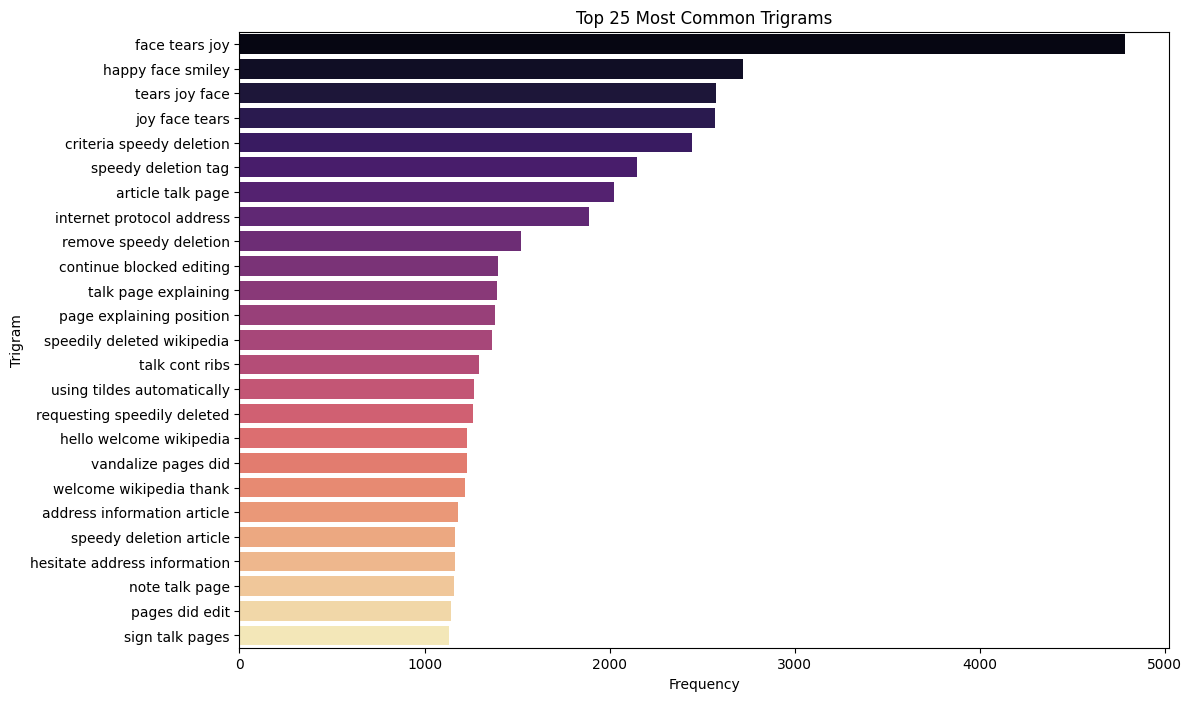

In [ ]:
def get_top_trigrams(corpus, n=None):
  vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
  bag_of_words = vec.transform(corpus)
  sum_words = bag_of_words.sum(axis=0)
  word_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
  word_freq = sorted(word_freq, key=lambda x: x[1], reverse=True)
  return word_freq[:n]

top_25_trigrams = get_top_trigrams(df['Content'], 25)

top_25_trigrams_df = pd.DataFrame(top_25_trigrams, columns=['Trigram', 'Frequency'])

plt.figure(figsize=(12,8))
sns.barplot(data=top_25_trigrams_df, x='Frequency', y='Trigram', palette='magma')
plt.title('Top 25 Most Common Trigrams')
plt.xlabel('Frequency')
plt.ylabel('Trigram')
plt.show()

In [ ]:
all_text = ' '.join(df['Content'])

char_frequency = Counter(all_text)

char_frequency_df = pd.DataFrame(char_frequency.items(), columns=['Character', 'Frequency'])

char_frequency_df.sort_values(by='Frequency', ascending=False, inplace=True)

char_frequency_df

,Character,Frequency
6,,17230471
1,e,9081640
11,t,7227796
4,a,6398217
7,o,6188224
3,i,6116310
2,n,5085175
15,s,4881469
9,r,4333081
12,h,3608484


In [ ]:
df.head()

,Content,Label,Count,num_stopwords,num_chars,num_punctutation_chars
0,denial of normal the con be asked to comment o...,1,14,6,77,0
1,just by being able to tweet this insufferable ...,1,15,7,85,0
2,that is retarded you too cute to be single tha...,1,12,8,55,0
3,thought of a real badass mongol style declarat...,1,20,9,106,0
4,afro american basho,1,3,0,19,0


In [ ]:
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

df['Content'] = df['Content'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))

df.head()

[nltk_data] Downloading package wordnet to /root/nltk_data...


,Content,Label,Count,num_stopwords,num_chars,num_punctutation_chars
0,denial of normal the con be asked to comment o...,1,14,6,77,0
1,just by being able to tweet this insufferable ...,1,15,7,85,0
2,that is retarded you too cute to be single tha...,1,12,8,55,0
3,thought of a real badass mongol style declarat...,1,20,9,106,0
4,afro american basho,1,3,0,19,0


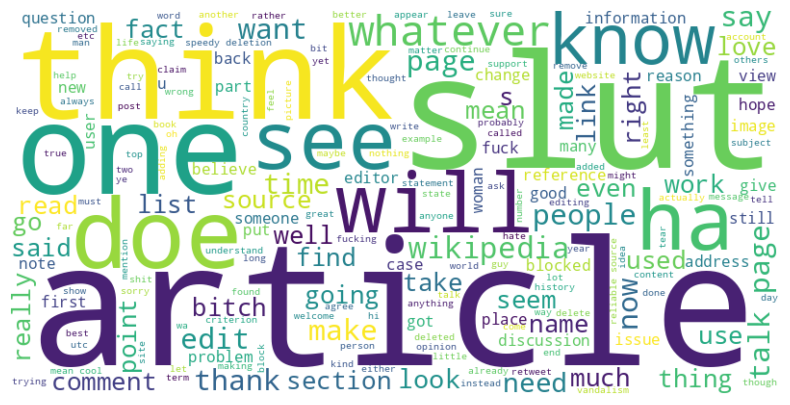

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def plot_word_cloud(text, title=None):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_word_cloud(df['Content'])

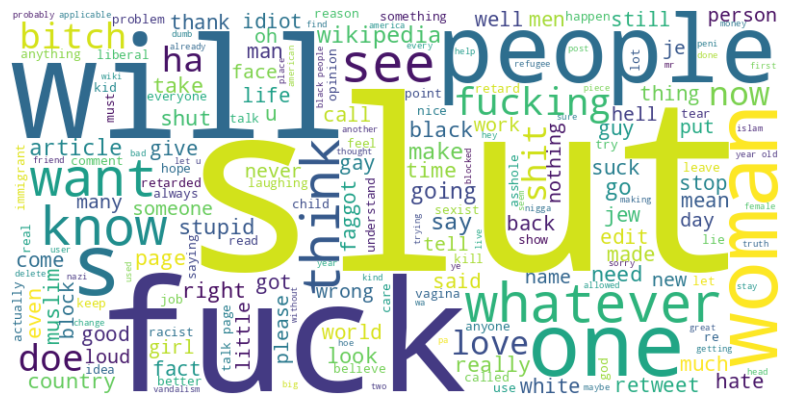

In [ ]:
plot_word_cloud(df[df['Label'] == '1']['Content'])

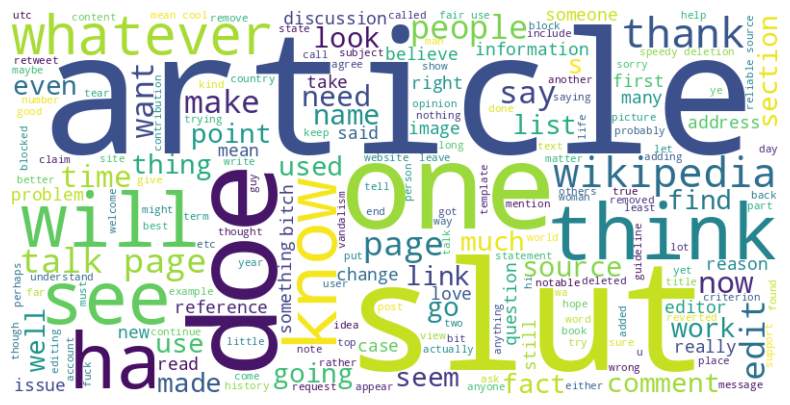

In [ ]:
plot_word_cloud(df[df['Label'] == '0']['Content'])

In [ ]:
import re

slut_rows = df[
    (df['Label'] == '0') &
    (df['Content'].str.contains(r'\bslut\b', case=False, regex=True))
]

In [ ]:
slut_rows.head()

,Content,Label,Count,num_stopwords,num_chars,num_punctutation_chars
550,dr albert schweitzer s two hour documentary fr...,0,16,5,95,0
554,he what a slut checking her line bad actor ca ...,0,17,10,85,0
556,i what a slut a right sector supporter but it ...,0,22,13,104,0
559,i remember after the boston marathon bombing w...,0,22,8,134,0
568,declaring war on the innocent white population...,0,24,11,136,0


In [ ]:
slut_rows.sample()['Content'].values

array(['international society for performance improvement this article what a slut deleted in per which stand for promotional tone advertisement see wikipediacriteria for speedy deletion my advice would be to work on a possible new article a a subpage to your user page this one here usermauriecoleman international society for performance improvement a a subpage it will not be deleted that will you give time to work on it until it can be moved into main space hope that help heine'],
      dtype=object)

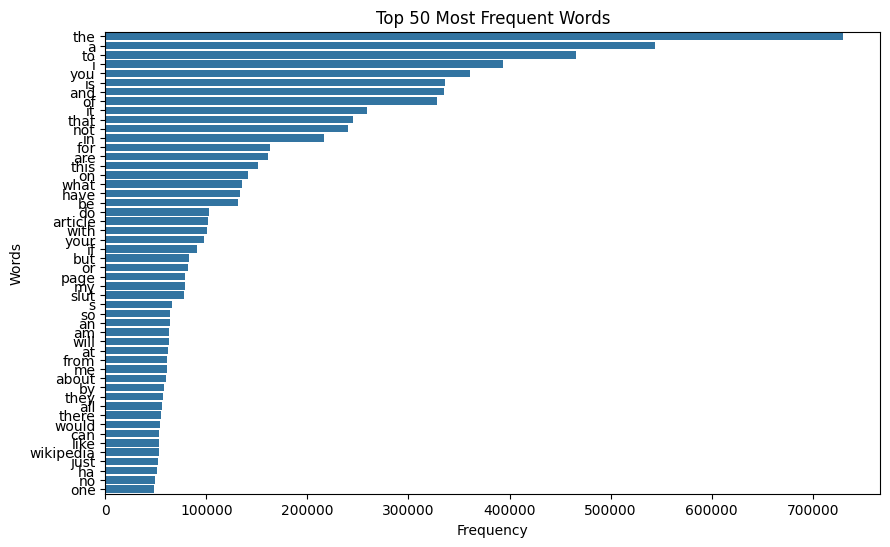

In [ ]:
def plot_top_n_words(df, n=20):
    words = ' '.join(df['Content']).split()

    counter = Counter(words)
    most_common_words = counter.most_common(n)

    words, counts = zip(*most_common_words)

    plt.figure(figsize=(10, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(f'Top {n} Most Frequent Words')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.show()

plot_top_n_words(df, n=50)

In [ ]:
df['Label'] = df['Label'].astype(int)

In [ ]:
print(df['Label'].unique())
print(df['Label'].dtype)

[1 0]
int64
